In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import sklearn.decomposition as sk

In [2]:
file_path = '/Users/rosalitarosenberg/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Comp Honours/code'

In [3]:
merged_data = pd.DataFrame(pd.read_pickle('raw_merged_data_v2'))
merged_data_1985 = pd.DataFrame(pd.read_pickle('raw_merged_data_v2_withinyears'))
#missing_dropped = merged_data.dropna(axis=1, how='all', ignore_index=True)
#dropped = missing_dropped.drop(['Lifetime risk of maternal death (1 in: rate varies by country)', 'Lifetime risk of maternal death (%)', 'Number of maternal deaths'], axis=1)

### all data

In [4]:
merged_data

date  \
0      2019.0   
1      2015.0   
2      2010.0   
3      2000.0   
4      2022.0   
...       ...   
16943  2005.0   
16944  2010.0   
16945  2015.0   
16946  2019.0   
16947     NaN   

       Women and girls who use menstrual materials (% of women and girls ages 15-49 who had a menstrual period within the last year)  \
0                                                  94.52                                                                               
1                                                    NaN                                                                               
2                                                    NaN                                                                               
3                                                    NaN                                                                               
4                                                    NaN                                                                               
...                                                  ...                                                                               
16943                                                NaN                                                                               
16944                                                NaN                                                                               
16945                                                NaN                                                                               
16946                                                NaN                                                                               
16947                                                NaN                                                                               

       setting  \
0      Algeria   
1      Algeria   
2      Algeria   
3      Algeria   
4      Algeria   
...        ...   
16943      NIU   
16944      NIU   
16945      NIU   
16946      NIU   
16947      TKL   

       Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)  \
0                                                 16.054                                                                                 
1                                                 18.055                                                                                 
2                                                 17.537                                                                                 
3                                                 20.944                                                                                 
4                                                    NaN                                                                                 
...                                                  ...                                                                                 
16943                                                NaN                                                                                 
16944                                                NaN                                                                                 
16945                                                NaN                                                                                 
16946                                                NaN                                                                                 
16947                                                NaN                                                                                 

       Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)  \
0                                                   45.0                                                                            
1                              

In [33]:
merged_relevant = merged_data[merged_data['date'] > 1984]
merged_relevant = merged_relevant[merged_relevant['date'] < 2019]
merged_relevant = merged_relevant.drop(columns=['Maternal mortality ratio (modeled estimate, per 100,000 live births)'], axis=1)

In [37]:
merged_features = merged_relevant.drop(columns=['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)

Text(0, 0.5, 'Proportion of Missing Feature Data per Year')

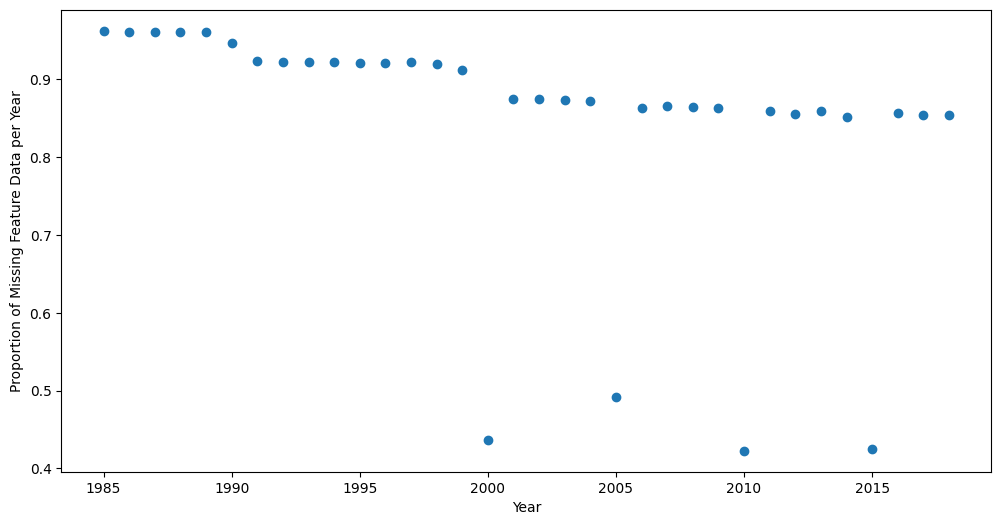

In [39]:
merged_data_peryear = (
    merged_features.groupby('date')
    .apply(lambda x: x.isna().sum().sum() / (x.shape[0] * x.shape[1]))
    .drop(columns='date', errors='ignore')  # Drop 'year' column if present
)

fig = plt.figure(figsize=(12, 6))
plt.scatter(merged_data_peryear.index, merged_data_peryear)
#plt.title('Proportion of Missing National and Modelled MMR Estimates Per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Missing Feature Data per Year')

In [36]:
pd.DataFrame(merged_data_peryear).sort_values(by=0, ascending=True).head(10)

0
date            
2010.0  0.422909
2015.0  0.425841
2000.0  0.436355
2005.0  0.492121
2014.0  0.851681
2017.0  0.854346
2018.0  0.854738
2012.0  0.855573
2016.0  0.856490
2011.0  0.858862

In [52]:
feature_missing = merged_features.isna().mean()
pd.DataFrame(feature_missing).sort_values(by=0)[160:170]

0
Literacy rate, youth total (% of people ages 15...  0.896429
Prevalence of stunting, height for age (% of ch...  0.897427
Educational attainment, Doctoral or equivalent,...  0.900421
Educational attainment, Doctoral or equivalent,...  0.900421
Literacy rate, youth total (% of people ages 15...  0.903415
Prevalence of overweight, weight for height (% ...  0.905855
Trained teachers in preprimary education (% of ...  0.908073
2.E.06 Other neurological disorders prevalence ...  0.913950
2.F.0 Mental disorders prevalence (age standard...  0.913950
2.E.07 Headache disorders prevalence (age stand...  0.913950

#### Specific Datasets

Text(0, 0.5, 'Proportion of Non-NAN Values')

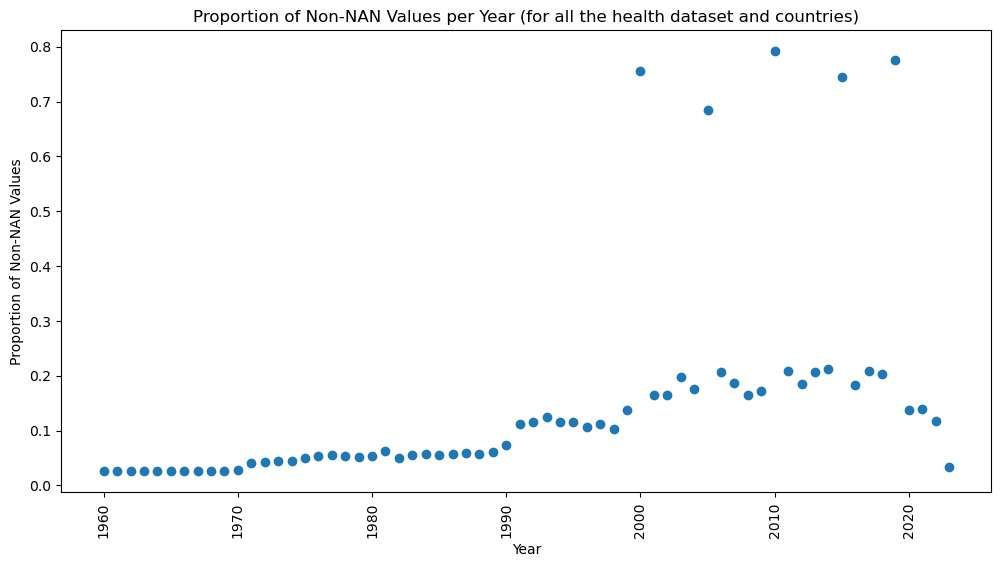

In [29]:
#the number of non-NAN values per year for each feature column 
nonna_peryear_200 = merged_data.iloc[:][:200].groupby('date').count()
#the number of non-NAN values per year (occurrences summed across all features)
merged_nonna_sum_200 = nonna_peryear_200.sum(axis='columns')

#the number of rows in each date partition multiplied by the number of features per row to get the number of possible non-NAN entries
merged_year_size_200 = merged_data.iloc[:][:200].groupby('date').size() * (merged_data.iloc[:][:200].shape[1])

missing_data_per_year_200 = merged_nonna_sum_200/merged_year_size_200

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for tick in ax.get_xticklabels():
     tick.set_rotation(90)

#plot of explained variance with number of PCA factors 
ax.scatter(missing_data_per_year_200.index, missing_data_per_year_200)
ax.set_title("Proportion of Non-NAN Values per Year (for all the health dataset and countries)")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Non-NAN Values")

In [53]:
merged_data.columns[:][200:218]

Index(['Women with high empowerment in the attitude to violence domain (%) Quintile 1 (poorest)',
       'Women with high empowerment in the attitude to violence domain (%) Quintile 5 (richest)',
       'Women with low empowerment in the attitude to violence domain (%) Quintile 1 (poorest)',
       'Women with low empowerment in the attitude to violence domain (%) Quintile 5 (richest)',
       'Women with medium empowerment in the attitude to violence domain (%) Quintile 1 (poorest)',
       'Women with medium empowerment in the attitude to violence domain (%) Quintile 5 (richest)',
       'Women with high empowerment in the decision-making domain (%) Quintile 1 (poorest)',
       'Women with high empowerment in the decision-making domain (%) Quintile 5 (richest)',
       'Women with low empowerment in the decision-making  domain (%) Quintile 1 (poorest)',
       'Women with low empowerment in the decision-making  domain (%) Quintile 5 (richest)',
       'Women with medium empowerment 

Text(0, 0.5, 'Proportion of Non-NAN Values')

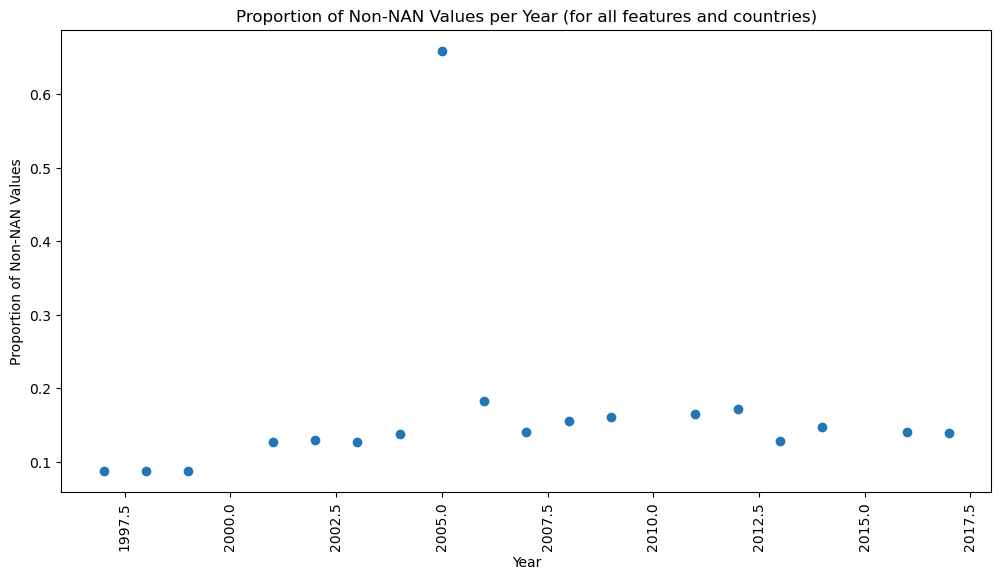

In [ ]:
#the number of non-NAN values per year for each feature column 
nonna_peryear_18 = merged_data.iloc[:][200:218].groupby('date').count()
#the number of non-NAN values per year (occurrences summed across all features)
merged_nonna_sum_18 = nonna_peryear_18.sum(axis='columns')

#the number of rows in each date partition multiplied by the number of features per row to get the number of possible non-NAN entries
merged_year_size_18 = merged_data.iloc[:][200:218].groupby('date').size() * (merged_data.iloc[:][200:218].shape[1])

missing_data_per_year_18 = merged_nonna_sum_18/merged_year_size_18

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for tick in ax.get_xticklabels():
     tick.set_rotation(90)

#plot of explained variance with number of PCA factors 
ax.scatter(missing_data_per_year_18.index, missing_data_per_year_18)
ax.set_title("Proportion of Non-NAN Values per Year (for the empowerment dataset and all countries)")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Non-NAN Values")

In [55]:
218+386

604

Text(0, 0.5, 'Proportion of Non-NAN Values')

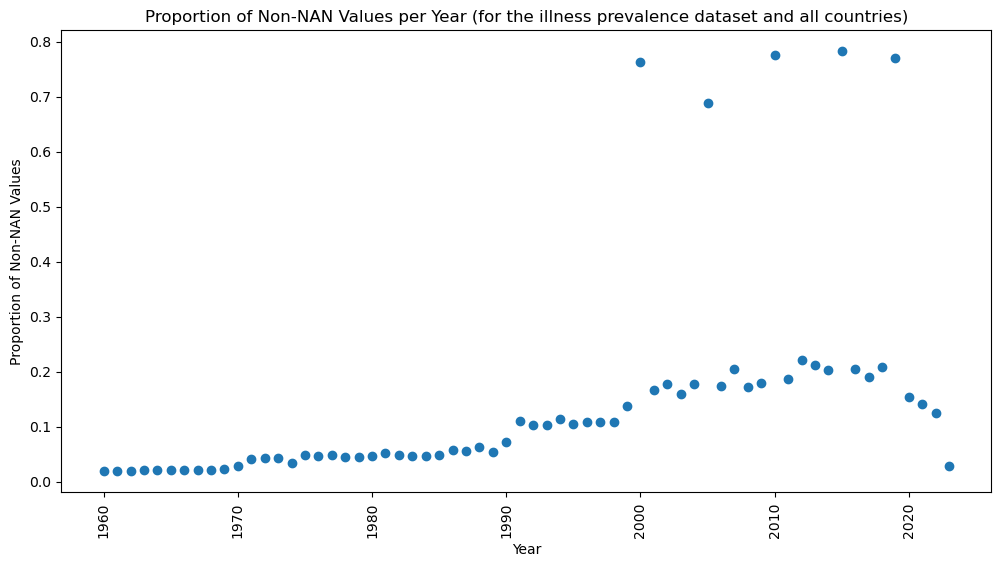

In [57]:
#the number of non-NAN values per year for each feature column 
nonna_peryear_604 = merged_data.iloc[:][218:604].groupby('date').count()
#the number of non-NAN values per year (occurrences summed across all features)
merged_nonna_sum_604 = nonna_peryear_604.sum(axis='columns')

#the number of rows in each date partition multiplied by the number of features per row to get the number of possible non-NAN entries
merged_year_size_604 = merged_data.iloc[:][218:604].groupby('date').size() * (merged_data.iloc[:][218:604].shape[1])

missing_data_per_year_604 = merged_nonna_sum_604/merged_year_size_604

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for tick in ax.get_xticklabels():
     tick.set_rotation(90)

#plot of explained variance with number of PCA factors 
ax.scatter(missing_data_per_year_604.index, missing_data_per_year_604)
ax.set_title("Proportion of Non-NAN Values per Year (for the illness prevalence dataset and all countries)")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Non-NAN Values")

Text(0, 0.5, 'Proportion of Non-NAN Values')

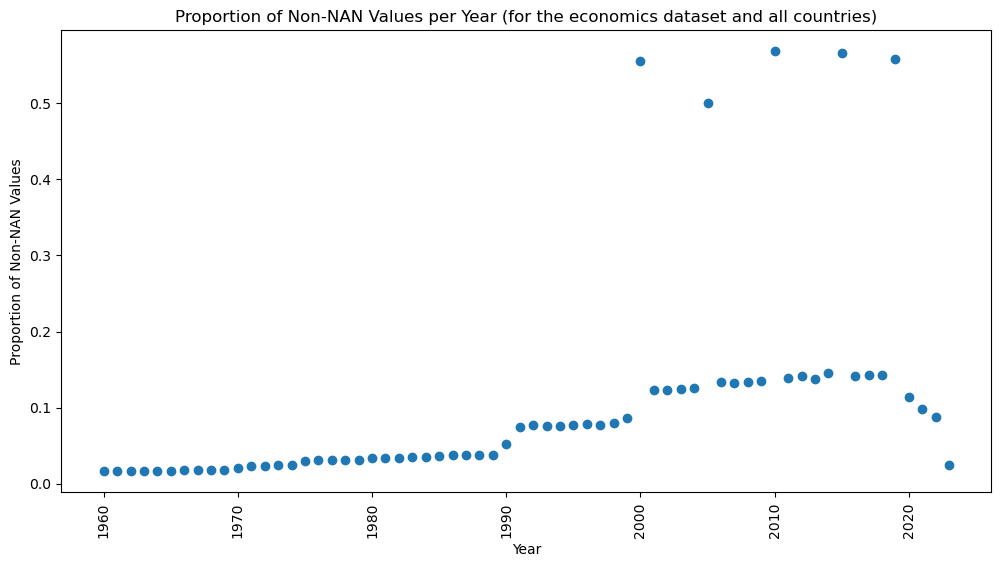

In [59]:
#the number of non-NAN values per year for each feature column 
nonna_peryear_econ = merged_data.iloc[:][604:].groupby('date').count()
#the number of non-NAN values per year (occurrences summed across all features)
merged_nonna_sum_econ = nonna_peryear_econ.sum(axis='columns')

#the number of rows in each date partition multiplied by the number of features per row to get the number of possible non-NAN entries
merged_year_size_econ = merged_data.iloc[:][604:].groupby('date').size() * (merged_data.iloc[:][604:].shape[1])

missing_data_per_year_econ = merged_nonna_sum_econ/merged_year_size_econ

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for tick in ax.get_xticklabels():
     tick.set_rotation(90)

#plot of explained variance with number of PCA factors 
ax.scatter(missing_data_per_year_econ.index, missing_data_per_year_econ)
ax.set_title("Proportion of Non-NAN Values per Year (for the economics dataset and all countries)")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Non-NAN Values")

### By income level

Text(0, 0.5, 'Proportion of Non-NAN Values')

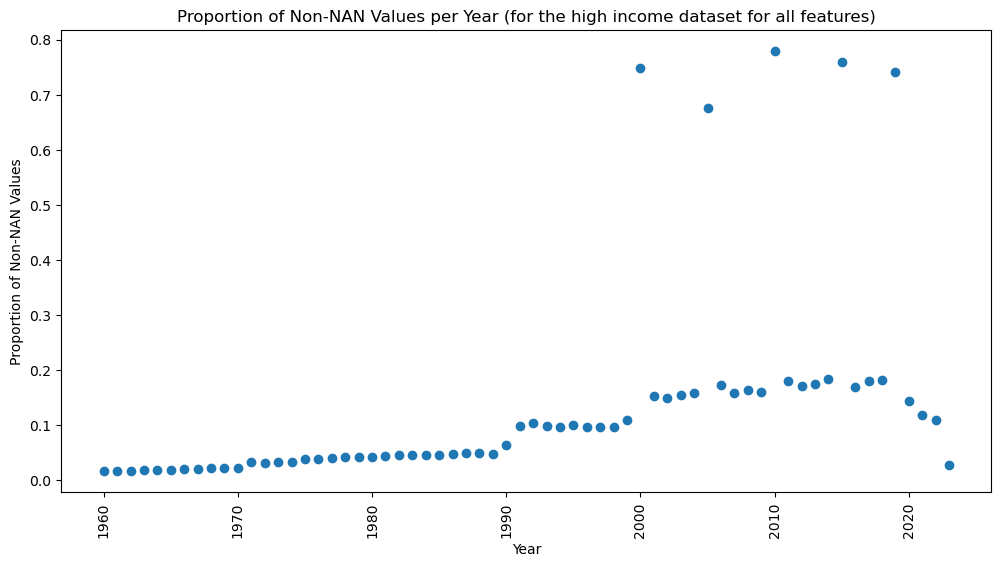

In [60]:
#the number of non-NAN values per year for each feature column 
nonna_peryear_highinc = merged_data[merged_data['income_num'] == 1].groupby('date').count()
#the number of non-NAN values per year (occurrences summed across all features)
merged_nonna_sum_highinc = nonna_peryear_highinc.sum(axis='columns')

#the number of rows in each date partition multiplied by the number of features per row to get the number of possible non-NAN entries
merged_year_size_highinc = merged_data[merged_data['income_num'] == 1].groupby('date').size() * (merged_data[merged_data['income_num'] == 1].shape[1])

missing_data_per_year_highinc = merged_nonna_sum_highinc/merged_year_size_highinc

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for tick in ax.get_xticklabels():
     tick.set_rotation(90)

#plot of explained variance with number of PCA factors 
ax.scatter(missing_data_per_year_highinc.index, missing_data_per_year_highinc)
ax.set_title("Proportion of Non-NAN Values per Year (for the high income dataset for all features)")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Non-NAN Values")

Text(0, 0.5, 'Proportion of Non-NAN Values')

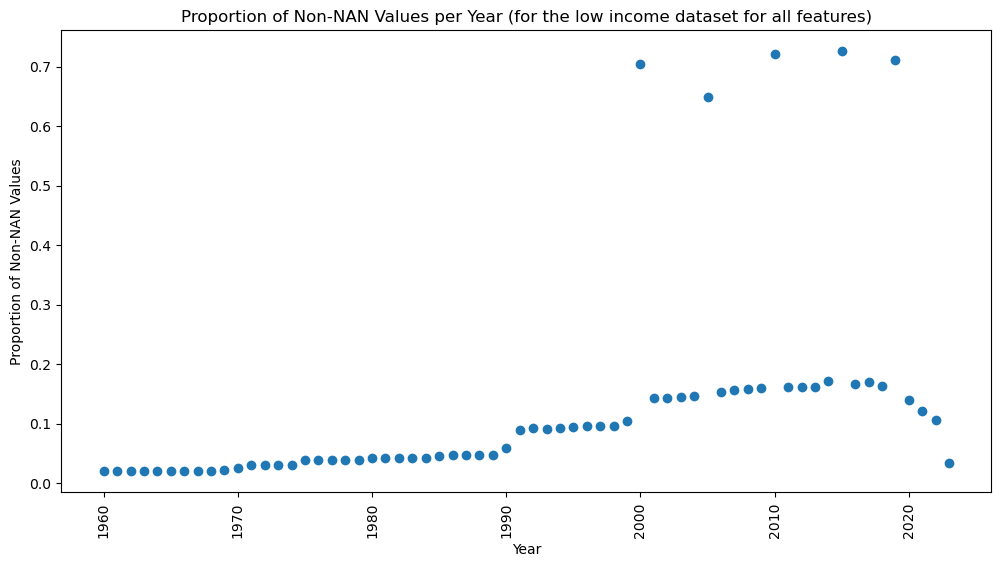

In [61]:
#the number of non-NAN values per year for each feature column 
nonna_peryear_lowinc = merged_data[merged_data['income_num'] == 4].groupby('date').count()
#the number of non-NAN values per year (occurrences summed across all features)
merged_nonna_sum_lowinc = nonna_peryear_lowinc.sum(axis='columns')

#the number of rows in each date partition multiplied by the number of features per row to get the number of possible non-NAN entries
merged_year_size_lowinc = merged_data[merged_data['income_num'] == 4].groupby('date').size() * (merged_data[merged_data['income_num'] == 4].shape[1])

missing_data_per_year_lowinc = merged_nonna_sum_lowinc/merged_year_size_lowinc

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for tick in ax.get_xticklabels():
     tick.set_rotation(90)

#plot of explained variance with number of PCA factors 
ax.scatter(missing_data_per_year_lowinc.index, missing_data_per_year_lowinc)
ax.set_title("Proportion of Non-NAN Values per Year (for the low income dataset for all features)")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Non-NAN Values")

### MMR

In [8]:
mmr = merged_data[['date', 'Maternal mortality ratio (national estimate, per 100,000 live births)']]

In [16]:
missing_proportion = (
    mmr.groupby('date')
    .apply(lambda x: x.isna().mean())
    .drop(columns='date', errors='ignore')  # Drop 'year' column if present
)

In [17]:
pd.DataFrame(missing_proportion).tail(50)

Maternal mortality ratio (national estimate, per 100,000 live births)
date                                                                         
1974.0                                           1.000000                    
1975.0                                           1.000000                    
1976.0                                           1.000000                    
1977.0                                           1.000000                    
1978.0                                           1.000000                    
1979.0                                           1.000000                    
1980.0                                           1.000000                    
1981.0                                           1.000000                    
1982.0                                           1.000000                    
1983.0                                           1.000000                    
1984.0                                           1.000000                    
1985.0                                           0.750943                    
1986.0                                           0.743396                    
1987.0                                           0.732075                    
1988.0                                           0.754717                    
1989.0                                           0.762264                    
1990.0                                           0.754717                    
1991.0                                           0.747170                    
1992.0                                           0.732075                    
1993.0                                           0.732075                    
1994.0                                           0.701887                    
1995.0                                           0.698113                    
1996.0                                           0.667925                    
1997.0                                           0.686792                    
1998.0                                           0.683019                    
1999.0                                           0.675472                    
2000.0                                           0.632959                    
2001.0                                           0.649057                    
2002.0                                           0.656604                    
2003.0                                           0.633962                    
2004.0                                           0.626415                    
2005.0                                           0.617978                    
2006.0                                           0.607547                    
2007.0                                           0.626415                    
2008.0                                           0.618868                    
2009.0                                           0.611321                    
2010.0                                           0.602996                    
2011.0                                           0.577358                    
2012.0                                           0.611321                    
2013.0                                           0.622642                    
2014.0                                           0.630189                    
2015.0                                           0.689139                    
2016.0                                           0.739623                    
2017.0                                           0.860377                    
2018.0                                           0.947170                    
2019.0                                           1.000000                    
2020.0                                           1.000000                    
2021.0                                           1.000000                    
2022.0                                           1.000000                    
2023.0                        

In [27]:
missing_proportion_less = missing_proportion[(missing_proportion.index < 2019)]
missing_proportion_relevant = missing_proportion_less[(missing_proportion_less.index > 1984)]
missing_proportion_relevant

Maternal mortality ratio (national estimate, per 100,000 live births)
date                                                                         
1985.0                                           0.750943                    
1986.0                                           0.743396                    
1987.0                                           0.732075                    
1988.0                                           0.754717                    
1989.0                                           0.762264                    
1990.0                                           0.754717                    
1991.0                                           0.747170                    
1992.0                                           0.732075                    
1993.0                                           0.732075                    
1994.0                                           0.701887                    
1995.0                                           0.698113                    
1996.0                                           0.667925                    
1997.0                                           0.686792                    
1998.0                                           0.683019                    
1999.0                                           0.675472                    
2000.0                                           0.632959                    
2001.0                                           0.649057                    
2002.0                                           0.656604                    
2003.0                                           0.633962                    
2004.0                                           0.626415                    
2005.0                                           0.617978                    
2006.0                                           0.607547                    
2007.0                                           0.626415                    
2008.0                                           0.618868                    
2009.0                                           0.611321                    
2010.0                                           0.602996                    
2011.0                                           0.577358                    
2012.0                                           0.611321                    
2013.0                                           0.622642                    
2014.0                                           0.630189                    
2015.0                                           0.689139                    
2016.0                                           0.739623                    
2017.0                                           0.860377                    
2018.0                                           0.947170

Text(0, 0.5, 'Proportion of Missing National MMR Estimates per Year')

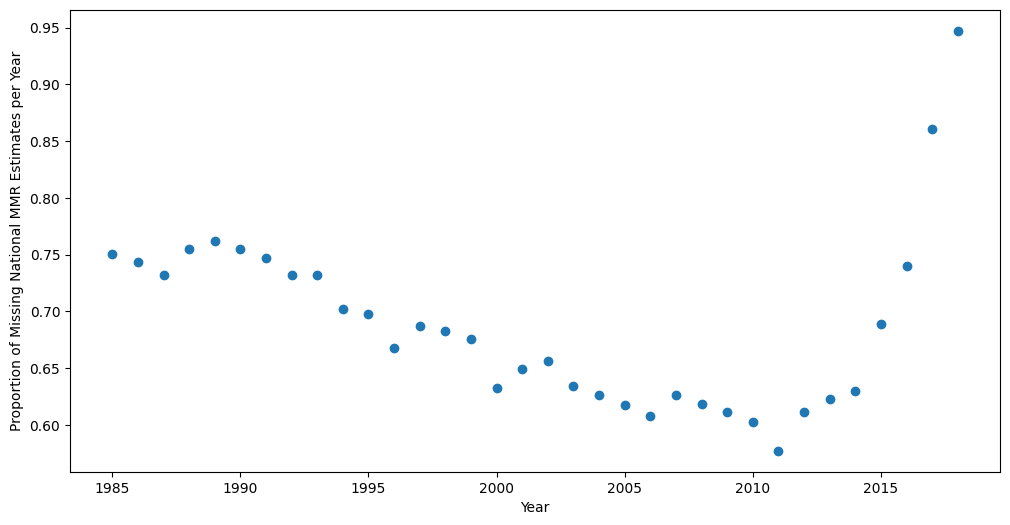

In [28]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(missing_proportion_relevant.index, missing_proportion_relevant['Maternal mortality ratio (national estimate, per 100,000 live births)'])
#plt.title('Proportion of Missing National and Modelled MMR Estimates Per Year Between 1985 and 2019')
plt.xlabel('Year')
plt.ylabel('Proportion of Missing National MMR Estimates per Year')

In [47]:
#the number of non-NAN values per year for each feature column 
mmr_nat_peryear = mmr[['date', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].groupby('date').count()
#the number of non-NAN values per year (occurrences summed across all features)
mmr_nat_nonna_sum = mmr_nat_peryear.sum(axis='columns')

#the number of rows in each date partition multiplied by the number of features per row to get the number of possible non-NAN entries
mmr_nat_year_size = mmr[['date', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].groupby('date').size() * (mmr['date', 'Maternal mortality ratio (national estimate, per 100,000 live births)'].shape[1])

mmr_nat_missing_data_per_year = mmr_nat_nonna_sum/mmr_nat_year_size
mmr_nat_missing_data_per_year

KeyError: ('date', 'Maternal mortality ratio (national estimate, per 100,000 live births)')

Text(0, 0.5, 'Proportion of Non-NAN MMR Values')

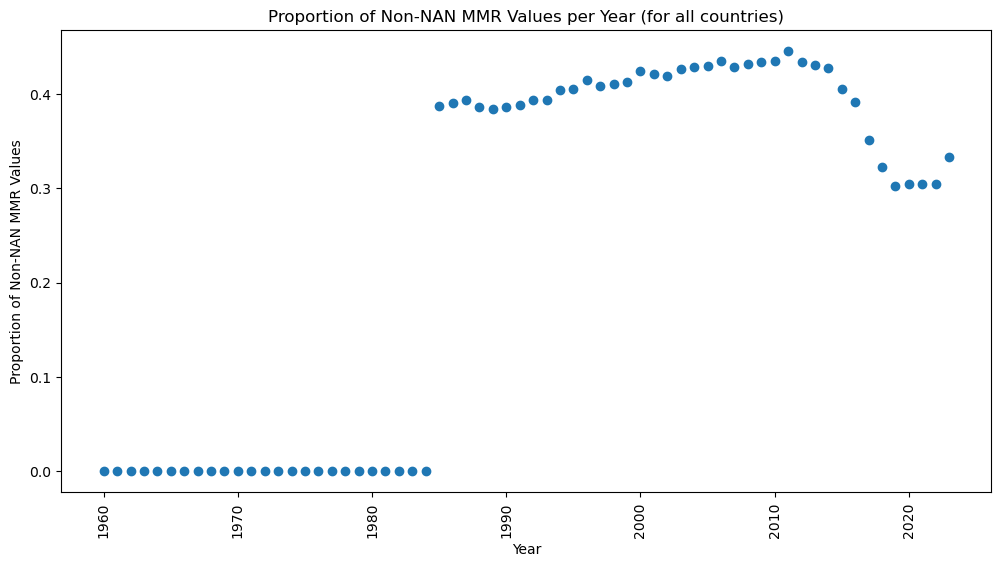

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for tick in ax.get_xticklabels():
     tick.set_rotation(90)

ax.scatter(mmr_missing_data_per_year.index, mmr_missing_data_per_year)
ax.set_title("Proportion of Non-Missing MMR Values per Year (for all countries)")
ax.set_xlabel("Year")
ax.set_ylabel("Proportion of Non-Missing MMR Values")

### Post 1985 Data

In [155]:
pd.DataFrame(merged_data_1985).shape

(9550, 733)

In [138]:
merged_data_1985_percol = merged_data_1985.isna().mean()

over90 = pd.DataFrame(merged_data_1985_percol).sort_values(by=0)[541:]
over90

0
Literacy rate, youth total (% of people ages 15...  0.900733
Cause of death, by non-communicable diseases, a...  0.903246
Cause of death, by communicable diseases and ma...  0.903246
Cause of death, by injury, female (% of female ...  0.903246
Cause of death, by communicable diseases and ma...  0.903246
...                                                      ...
Women and girls who have private places to wash...  0.994869
Women and girls who have private places to wash...  0.994869
Women and girls who participate in activities d...  0.995393
Women and girls who participate in activities d...  0.995393
Women and girls who participate in activities d...  0.995393

[192 rows x 1 columns]

In [89]:
merged_data_1985_peryear = (
    merged_data_1985.groupby('date')
    .apply(lambda x: x.isna().sum().sum() / (x.shape[0] * x.shape[1]))
    .drop(columns='date', errors='ignore')  # Drop 'year' column if present
)

Text(0, 0.5, 'Proportion of Missing Data Across (Post 1984)')

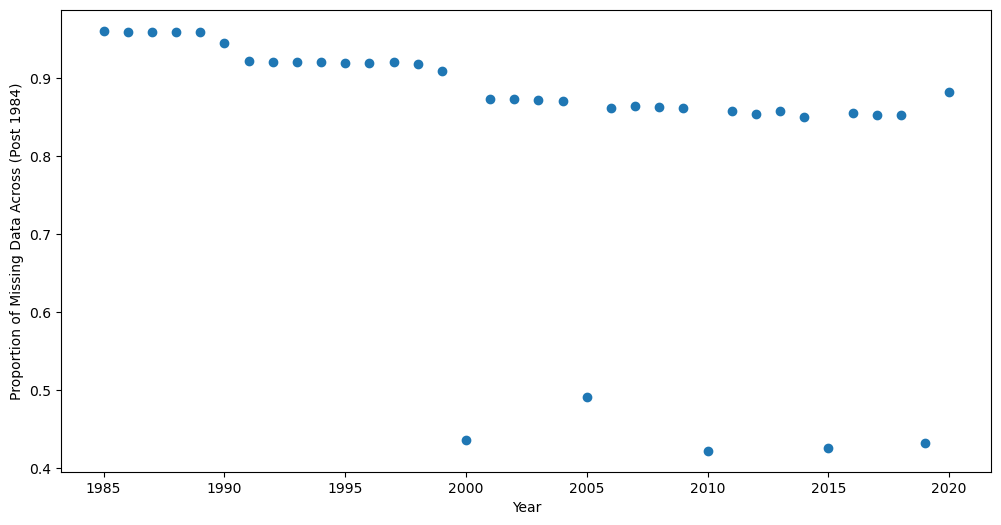

In [93]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(merged_data_1985_peryear.index, merged_data_1985_peryear)
#plt.title('Proportion of Missing National and Modelled MMR Estimates Per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Missing Data Across (Post 1984)')

In [97]:
pd.DataFrame(merged_data_1985_peryear).sort_values(by=0, ascending=True).head(25)

0
date            
2010.0  0.422460
2015.0  0.425387
2019.0  0.432980
2000.0  0.435888
2005.0  0.491577
2014.0  0.850637
2017.0  0.853299
2018.0  0.853690
2012.0  0.854524
2016.0  0.855440
2011.0  0.857808
2013.0  0.858550
2006.0  0.862411
2009.0  0.862519
2008.0  0.863502
2007.0  0.864254
2004.0  0.871034
2003.0  0.872357
2001.0  0.873603
2002.0  0.874164
2020.0  0.883086
1999.0  0.910134
1998.0  0.918129
1996.0  0.919360
1995.0  0.920260

### Excluding 90+% missing variables

In [145]:
cols_to_drop = merged_data_1985_percol[merged_data_1985_percol > 0.90].index
under90 = merged_data_1985.drop(cols_to_drop, axis=1)
under90

date  setting  \
0     2019.0  Algeria   
1     2015.0  Algeria   
2     2010.0  Algeria   
3     2000.0  Algeria   
4     2020.0  Algeria   
...      ...      ...   
9545  2000.0      NIU   
9546  2005.0      NIU   
9547  2010.0      NIU   
9548  2015.0      NIU   
9549  2019.0      NIU   

      Antiretroviral therapy coverage (% of adult males living with HIV)  \
0                                                  61.0                    
1                                                  43.0                    
2                                                  21.0                    
3                                                   7.0                    
4                                                  62.0                    
...                                                 ...                    
9545                                                NaN                    
9546                                                NaN                    
9547                                                NaN                    
9548                                                NaN                    
9549                                                NaN                    

      Mortality rate, infant (per 1,000 live births)  \
0                                               20.1   
1                                               21.7   
2                                               23.9   
3                                               35.6   
4                                               19.7   
...                                              ...   
9545                                             NaN   
9546                                             NaN   
9547                                             NaN   
9548                                             NaN   
9549                                             NaN   

      Prevalence of current tobacco use, females (% of female adults)  \
0                                                   0.7                 
1                                                   0.9                 
2                                                   1.2                 
3                                                   1.9                 
4                                                   0.7                 
...                                                 ...                 
9545                                                NaN                 
9546                                                NaN                 
9547                                                NaN                 
9548                                                NaN                 
9549                                                NaN                 

      Survival to age 65, female (% of cohort)  \
0                                       86.581   
1                                       85.586   
2                                       84.187   
3                                       78.802   
4                                       83.901   
...                                        ...   
9545                                       NaN   
9546                                       NaN   
9547                                       NaN   
9548                                       NaN   
9549                                       NaN   

      Pregnant women receiving prenatal care (%)  \
0                                           95.3   
1                                            NaN   
2                                            NaN   
3                                           79.0   
4                                            NaN   
...                                          ...   
9545                                         NaN   
9546                                         NaN   
9547                                         NaN   
9548                                         NaN   
9549                                         NaN   

      Mortality ra

In [ ]:
over90.index['']

Index(['Literacy rate, youth total (% of people ages 15-24) male',
       'Cause of death, by non-communicable diseases, ages 15-59, male (% of male population ages 15-59)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, male (% of male population)',
       'Cause of death, by injury, female (% of female population)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, female (% of female population ages 0-4)',
       'Cause of death, by non-communicable diseases, ages 0-4, female (% of female population ages 0-4)',
       'Cause of death, by non-communicable diseases, ages 60+, male (% of male population ages 60+)',
       'Cause of death, by injury, ages 60+, male (% of male population ages 60+)',
       'Cause of death, by injury (% of total)',
       'Cause of death, by injury, ages 5-14 (% of population ages 5-14)',
       ...
       'Female genital mutilation prevalence (%):

Text(0, 0.5, 'Proportion of Missing Data After Variable Exclusion (1984-2000)')

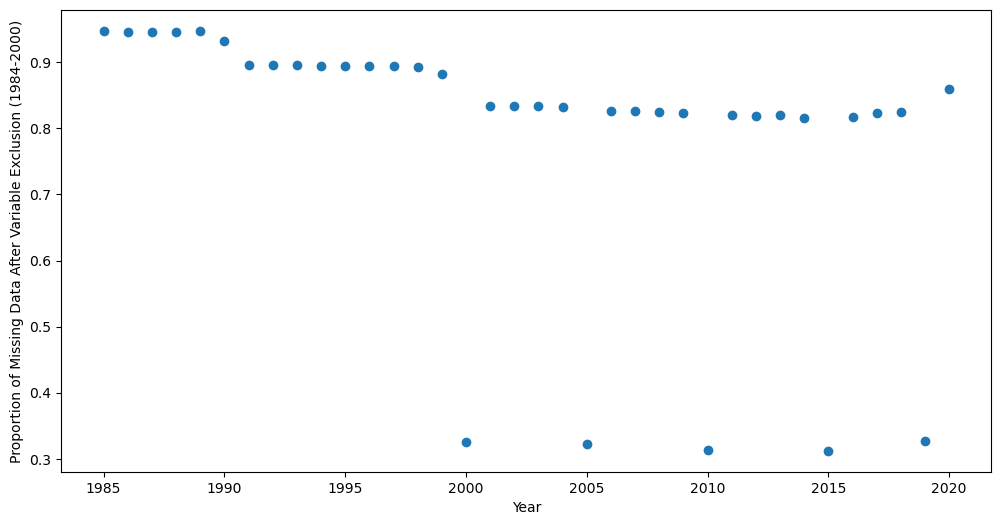

In [148]:
under90_missing = (
    under90[under90['date'] > 1984].groupby('date')
    .apply(lambda x: x.isna().sum().sum() / (x.shape[0] * x.shape[1]))
    .drop(columns='date', errors='ignore')  # Drop 'year' column if present
)

fig = plt.figure(figsize=(12, 6))
plt.scatter(under90_missing.index, under90_missing)
#plt.title('Proportion of Missing Data Per Year After Excluding ')
plt.xlabel('Year')
plt.ylabel('Proportion of Missing Data After Variable Exclusion (1984-2000)')

In [149]:
pd.DataFrame(under90_missing).sort_values(by=0, ascending=True).head(25)

0
date            
2015.0  0.312239
2010.0  0.314018
2005.0  0.323108
2000.0  0.326078
2019.0  0.326680
2014.0  0.815290
2016.0  0.816538
2012.0  0.818561
2013.0  0.819775
2011.0  0.819844
2009.0  0.823311
2017.0  0.823430
2008.0  0.824490
2018.0  0.825062
2007.0  0.825690
2006.0  0.826073
2004.0  0.831751
2002.0  0.833746
2003.0  0.833795
2001.0  0.834227
2020.0  0.859045
1999.0  0.882928
1998.0  0.892024
1996.0  0.893635
1995.0  0.893837

In [156]:
merged_mmrdrop = under90.dropna(subset=['Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Maternal mortality ratio (national estimate, per 100,000 live births)'], how='all')
merged_mmrdrop

date      setting  \
0     2019.0      Algeria   
1     2015.0      Algeria   
2     2010.0      Algeria   
3     2000.0      Algeria   
4     2020.0      Algeria   
...      ...          ...   
8851  1989.0  Puerto Rico   
8852  1988.0  Puerto Rico   
8853  1987.0  Puerto Rico   
8854  1986.0  Puerto Rico   
8855  1985.0  Puerto Rico   

      Antiretroviral therapy coverage (% of adult males living with HIV)  \
0                                                  61.0                    
1                                                  43.0                    
2                                                  21.0                    
3                                                   7.0                    
4                                                  62.0                    
...                                                 ...                    
8851                                                NaN                    
8852                                                NaN                    
8853                                                NaN                    
8854                                                NaN                    
8855                                                NaN                    

      Mortality rate, infant (per 1,000 live births)  \
0                                               20.1   
1                                               21.7   
2                                               23.9   
3                                               35.6   
4                                               19.7   
...                                              ...   
8851                                             NaN   
8852                                             NaN   
8853                                             NaN   
8854                                             NaN   
8855                                             NaN   

      Prevalence of current tobacco use, females (% of female adults)  \
0                                                   0.7                 
1                                                   0.9                 
2                                                   1.2                 
3                                                   1.9                 
4                                                   0.7                 
...                                                 ...                 
8851                                                NaN                 
8852                                                NaN                 
8853                                                NaN                 
8854                                                NaN                 
8855                                                NaN                 

      Survival to age 65, female (% of cohort)  \
0                                       86.581   
1                                       85.586   
2                                       84.187   
3                                       78.802   
4                                       83.901   
...                                        ...   
8851                                    82.698   
8852                                    84.699   
8853                                    85.073   
8854                                    84.929   
8855                                    83.579   

      Pregnant women receiving prenatal care (%)  \
0                                           95.3   
1                                            NaN   
2                                            NaN   
3                                           79.0   
4                                            NaN   
...                                          ...   
8851                                         NaN   
8852                                         NaN   
8853                                         NaN   
8854                                         NaN   
8855                   

### Income Level and Missingness

Text(0, 0.5, 'Proportion of Missing Data (Post 1984)')

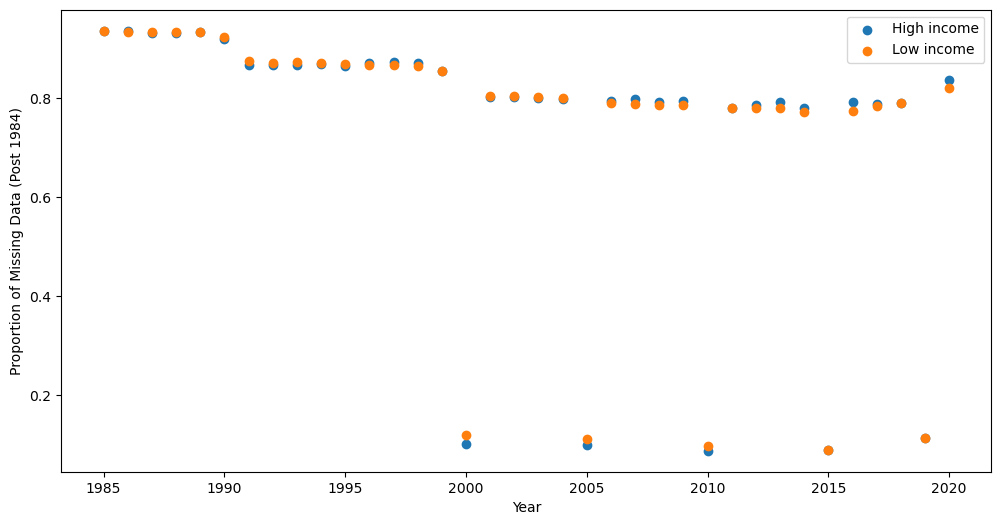

In [206]:
inc_missing_1 = (
    merged_mmrdrop[merged_mmrdrop['income_num'] == 1].groupby(['date'])
    .apply(lambda x: x.isna().sum().sum() / (x.shape[0] * x.shape[1]))
)
inc_missing_4 = (
    merged_mmrdrop[merged_mmrdrop['income_num'] == 4].groupby(['date'])
    .apply(lambda x: x.isna().sum().sum() / (x.shape[0] * x.shape[1]))
)

fig = plt.figure(figsize=(12, 6))
plt.scatter(inc_missing_1.index, inc_missing_1, label='High income')
plt.scatter(inc_missing_4.index, inc_missing_4, label='Low income')
plt.legend()
#plt.title('Proportion of Missing National and Modelled MMR Estimates Per Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Missing Data (Post 1984)')

### Correlation Heatmap

In [168]:
correlation_matrix = merged_mmrdrop.corr(numeric_only=True)
correlation_matrix

date  \
date                                                1.000000e+00   
Antiretroviral therapy coverage (% of adult mal...  6.950010e-01   
Mortality rate, infant (per 1,000 live births)     -3.251983e-01   
Prevalence of current tobacco use, females (% o... -2.267200e-01   
Survival to age 65, female (% of cohort)            2.489278e-01   
...                                                          ...   
Share of youth not in education, employment or ...  6.363899e-02   
Trained teachers in preprimary education (% of ...  1.930778e-01   
Trained teachers in primary education (% of tot...  1.554753e-01   
Trained teachers in primary education (% of tot...  1.447946e-01   
income_num                                          1.341329e-13   

                                                    Antiretroviral therapy coverage (% of adult males living with HIV)  \
date                                                                                         0.695001                    
Antiretroviral therapy coverage (% of adult mal...                                           1.000000                    
Mortality rate, infant (per 1,000 live births)                                              -0.478940                    
Prevalence of current tobacco use, females (% o...                                           0.028533                    
Survival to age 65, female (% of cohort)                                                     0.417711                    
...                                                                                               ...                    
Share of youth not in education, employment or ...                                          -0.150161                    
Trained teachers in preprimary education (% of ...                                           0.191356                    
Trained teachers in primary education (% of tot...                                           0.268031                    
Trained teachers in primary education (% of tot...                                           0.247805                    
income_num                                                                                   0.367763                    

                                                    Mortality rate, infant (per 1,000 live births)  \
date                                                                                     -0.325198   
Antiretroviral therapy coverage (% of adult mal...                                       -0.478940   
Mortality rate, infant (per 1,000 live births)                                            1.000000   
Prevalence of current tobacco use, females (% o...                                       -0.272741   
Survival to age 65, female (% of cohort)                                                 -0.908881   
...                                                                                            ...   
Share of youth not in education, employment or ...                                        0.143226   
Trained teachers in preprimary education (% of ...                                       -0.299199   
Trained teachers in primary education (% of tot...                                       -0.287567   
Trained teachers in primary education (% of tot...                                       -0.286152   
income_num                                                                               -0.715650   

                                                    Prevalence of current tobacco use, females (% of female adults)  \
date                                                                                        -0.226720                 
Antiretroviral therapy coverage (% of adult mal...                                           0.028533                 
Mortality rate, infant (per 1,000 live births)                                              -0.272741                 
Prevalence of current tobacco use, females (% o...                           

In [166]:
correlation_matrix

date  \
date                                                1.000000e+00   
Antiretroviral therapy coverage (% of adult mal...  6.950010e-01   
Mortality rate, infant (per 1,000 live births)     -3.251983e-01   
Prevalence of current tobacco use, females (% o... -2.267200e-01   
Survival to age 65, female (% of cohort)            2.489278e-01   
...                                                          ...   
Share of youth not in education, employment or ...  6.363899e-02   
Trained teachers in preprimary education (% of ...  1.930778e-01   
Trained teachers in primary education (% of tot...  1.554753e-01   
Trained teachers in primary education (% of tot...  1.447946e-01   
income_num                                          1.341329e-13   

                                                    Antiretroviral therapy coverage (% of adult males living with HIV)  \
date                                                                                         0.695001                    
Antiretroviral therapy coverage (% of adult mal...                                           1.000000                    
Mortality rate, infant (per 1,000 live births)                                              -0.478940                    
Prevalence of current tobacco use, females (% o...                                           0.028533                    
Survival to age 65, female (% of cohort)                                                     0.417711                    
...                                                                                               ...                    
Share of youth not in education, employment or ...                                          -0.150161                    
Trained teachers in preprimary education (% of ...                                           0.191356                    
Trained teachers in primary education (% of tot...                                           0.268031                    
Trained teachers in primary education (% of tot...                                           0.247805                    
income_num                                                                                   0.367763                    

                                                    Mortality rate, infant (per 1,000 live births)  \
date                                                                                     -0.325198   
Antiretroviral therapy coverage (% of adult mal...                                       -0.478940   
Mortality rate, infant (per 1,000 live births)                                            1.000000   
Prevalence of current tobacco use, females (% o...                                       -0.272741   
Survival to age 65, female (% of cohort)                                                 -0.908881   
...                                                                                            ...   
Share of youth not in education, employment or ...                                        0.143226   
Trained teachers in preprimary education (% of ...                                       -0.299199   
Trained teachers in primary education (% of tot...                                       -0.287567   
Trained teachers in primary education (% of tot...                                       -0.286152   
income_num                                                                               -0.715650   

                                                    Prevalence of current tobacco use, females (% of female adults)  \
date                                                                                        -0.226720                 
Antiretroviral therapy coverage (% of adult mal...                                           0.028533                 
Mortality rate, infant (per 1,000 live births)                                              -0.272741                 
Prevalence of current tobacco use, females (% o...                           

In [187]:
corr_pairs = (
    correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))  # exclude self-correlation
        .stack()
        .reset_index()
)
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs['Ordered Pair'] = corr_pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
deduplicated_corr = corr_pairs.drop_duplicates('Ordered Pair')
top_90_corr = deduplicated_corr[abs(deduplicated_corr['Correlation']) > 0.9]
top_90_corr

Feature 1  \
594     Antiretroviral therapy coverage (% of adult ma...   
1075       Mortality rate, infant (per 1,000 live births)   
1081       Mortality rate, infant (per 1,000 live births)   
1096       Mortality rate, infant (per 1,000 live births)   
1108       Mortality rate, infant (per 1,000 live births)   
...                                                   ...   
274407  Educational attainment, at least Bachelor's or...   
275481  Educational attainment, Doctoral or equivalent...   
276555  Educational attainment, at least Master's or e...   
277629  Educational attainment, at least completed sho...   
286758  Trained teachers in primary education (% of to...   

                                                Feature 2  Correlation  \
594     Antiretroviral therapy coverage (% of adult fe...     0.956662   
1075             Survival to age 65, female (% of cohort)    -0.908881   
1081    Mortality rate, under-5, male (per 1,000 live ...     0.985829   
1096    Mortality rate, infant, female (per 1,000 live...     0.999303   
1108    Mortality rate, under-5, female (per 1,000 liv...     0.982426   
...                                                   ...          ...   
274407  Educational attainment, at least Bachelor's or...     0.907113   
275481  Educational attainment, Doctoral or equivalent...     0.906901   
276555  Educational attainment, at least Master's or e...     0.952147   
277629  Educational attainment, at least completed sho...     0.915337   
286758  Trained teachers in primary education (% of to...     0.909084   

                                             Ordered Pair  
594     (Antiretroviral therapy coverage (% of adult f...  
1075    (Mortality rate, infant (per 1,000 live births...  
1081    (Mortality rate, infant (per 1,000 live births...  
1096    (Mortality rate, infant (per 1,000 live births...  
1108    (Mortality rate, infant (per 1,000 live births...  
...                                                   ...  
274407  (Educational attainment, at least Bachelor's o...  
275481  (Educational attainment, Doctoral or equivalen...  
276555  (Educational attainment, at least Master's or ...  
277629  (Educational attainment, at least completed sh...  
286758  (Trained teachers in primary education (% of t...  

[358 rows x 4 columns]

In [176]:
import seaborn as sns

plt.figure(figsize=(12, 10))
strong_corr = correlation_matrix.where((abs(correlation_matrix) > 0.8))
strong_corr = strong_corr.dropna(how='all').dropna(axis=1, how='all')

sns.heatmap(strong_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'label': 'Correlation'})

plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


### Missing Patterns


In [6]:
missing_summary = merged_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_summary / len(merged_data)) * 100

# Combine into one DataFrame
missing_df = pd.DataFrame({
    #'missing_count': missing_summary,
    'missing_percent': missing_percent
})

missing_df.head(600)


missing_percent
Women and girls who participate in activities d...        99.710880
Women and girls who participate in activities d...        99.710880
Women and girls who participate in activities d...        99.710880
Women and girls who have private places to wash...        99.681378
Women and girls who have private places to wash...        99.681378
...                                                             ...
Educational attainment, at least completed lowe...        87.827472
Educational attainment, at least completed lowe...        87.827472
Labor force with advanced education (% of total...        87.036819
Labor force with advanced education (% of total...        87.025018
Labor force with intermediate education (% of t...        86.977814

[600 rows x 1 columns]

In [ ]:
missing_percent = pd.DataFrame(missing_percent)

RangeIndex(start=0, stop=1, step=1)

In [24]:
under90 = missing_percent[missing_percent.iloc[:][0] < 90]
for i in under90.index:
    print(i)

Educational attainment, at least completed short-cycle tertiary, population 25+ (%) (cumulative) female
Educational attainment, at least completed short-cycle tertiary, population 25+ (%) (cumulative) male
Educational attainment, at least completed primary, population 25+ years (%) (cumulative) male
Educational attainment, at least completed primary, population 25+ years (%) (cumulative) female
Educational attainment, at least completed upper secondary, population 25+ (%) (cumulative) female
Educational attainment, at least completed upper secondary, population 25+ (%) (cumulative) male
Educational attainment, at least completed lower secondary, population 25+ (%) (cumulative) male
Educational attainment, at least completed lower secondary, population 25+ (%) (cumulative) female
Labor force with advanced education (% of total working-age population with advanced education) female
Labor force with advanced education (% of total working-age population with advanced education) male
Labor 